## Introduction

In this part, I will review the structure of one of the convolutional neural networks that I will build, and through the structure we will notice the use of many concepts and methods in building neural networks in general.

## Calling the relevant libraries

In [1]:
# keras modules
import numpy as np
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, concatenate
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
#import ipyplot
import tensorflow
from tensorflow import keras
from keras import layers , Input 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import  plot_model

# loading mnist data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('shape of x_train' , x_train.shape)
print('shape of y_train' , y_train.shape)
print('shape of x_test' , x_test.shape)
print('shape of y_test' , y_test.shape)


shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)


## Showing a data item

In [5]:
pip install ipyplot

In [6]:
import ipyplot


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        



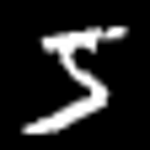
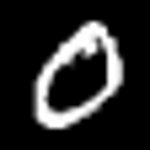
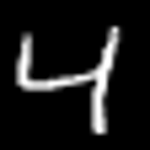
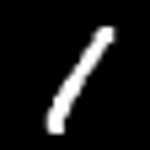
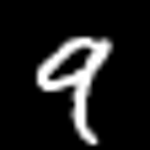


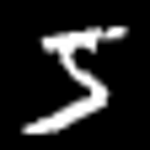
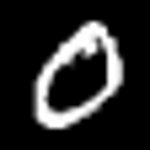
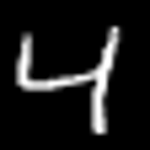
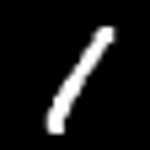
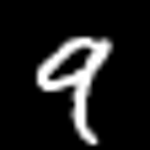

In [7]:
ipyplot.plot_images(x_train, max_images=5, img_width=150)

In [8]:
#import matplotlib.pyplot as plt
#digit=x_train[8]
#plt.imshow(digit, cmap=plt.cm.binary)
#plt.show()

## Data preprocessing

In [9]:
# compute the number of labels
number_labels=len(np.unique(y_train))
number_labels

10

In [10]:
# convert y_train & y_test to one-hot vector
y_train_2=to_categorical(y_train)
y_test_2=to_categorical(y_test)

In [11]:
print('y_train before : ' ,y_train.shape )
print('y_train after : ' , y_train_2.shape)

y_train before :  (60000,)
y_train after :  (60000, 10)


## Adjust the dimensions to fit the network.

In [12]:
print('x_train.shape :' , x_train.shape)
image_size=x_train.shape[1]
print('image size : ', image_size)

x_train.shape : (60000, 28, 28)
image size :  28


### resizeing & normalization

In [13]:
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
print('x_train after :',x_train.shape)
print('x_test after :' , x_test.shape)

x_train after : (60000, 28, 28, 1)
x_test after : (10000, 28, 28, 1)


## network parameters

In [15]:
# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = 32

# Building a Neural Network

**The main part of the structure of the neural network that I will build is a neural network with two inputs and one output, and we will rely on the concept of Functional API in Keras**

In order to build a beautiful neural network with two inputs, I must divide the task, which is, build the right part first, then the left part, then collect the parts and merge them into a layer using one of the mergers, then build a special part of the layers with a forked connection in order to overcome the overfitting This part will be inside the Dense layers, and this is good, and therefore I will be satisfied with that for now.

## Right Branch

In [72]:
# right branch of the neural network
right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters
# 3 layers of Conv2D-Dropout-MaxPooling2D
# number of filters doubles after each layer (32-64-128)
for i in range(3):
    y = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu',
               dilation_rate=2)(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2

## Left Branch

In [73]:
# left branch of neural network
left_inputs = Input(shape=input_shape)
x = left_inputs
filters = n_filters
# 3 layers of Conv2D-Dropout-MaxPooling2D
# number of filters doubles after each layer (32-64-128)
for i in range(3):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2

## Merge the left and right branches together in one layer.

In [74]:
# merge left and right branches outputs
y = concatenate([x, y])

## Complete neural network structure.

**Through this part of the network I will overcome the part of the overfitting that I encountered in many of the previous structures, let's wait and see the results.**

In [76]:
# feature maps to vector before connecting to Dense 
y=Flatten()(y)
first_dense=Dense(y.shape[1], activation='relu')(y)
y=Dropout(dropout)(first_dense)
y=Dense(y.shape[1],activation='relu')(y)
y=Dropout(0.3)(y)
y=layers.add([first_dense,y])
output=Dense(number_labels,activation='softmax')(y)

In [77]:
# build the model in functional API
model = Model([left_inputs, right_inputs], output)

## Showing the trainable parameters in the network.

In [78]:
# verify the model using layer text description
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_55 (Conv2D)             (None, 28, 28, 32)   320         ['input_16[0][0]']               
                                                                                                  
 conv2d_52 (Conv2D)             (None, 28, 28, 32)   320         ['input_15[0][0]']               
                                                                                            

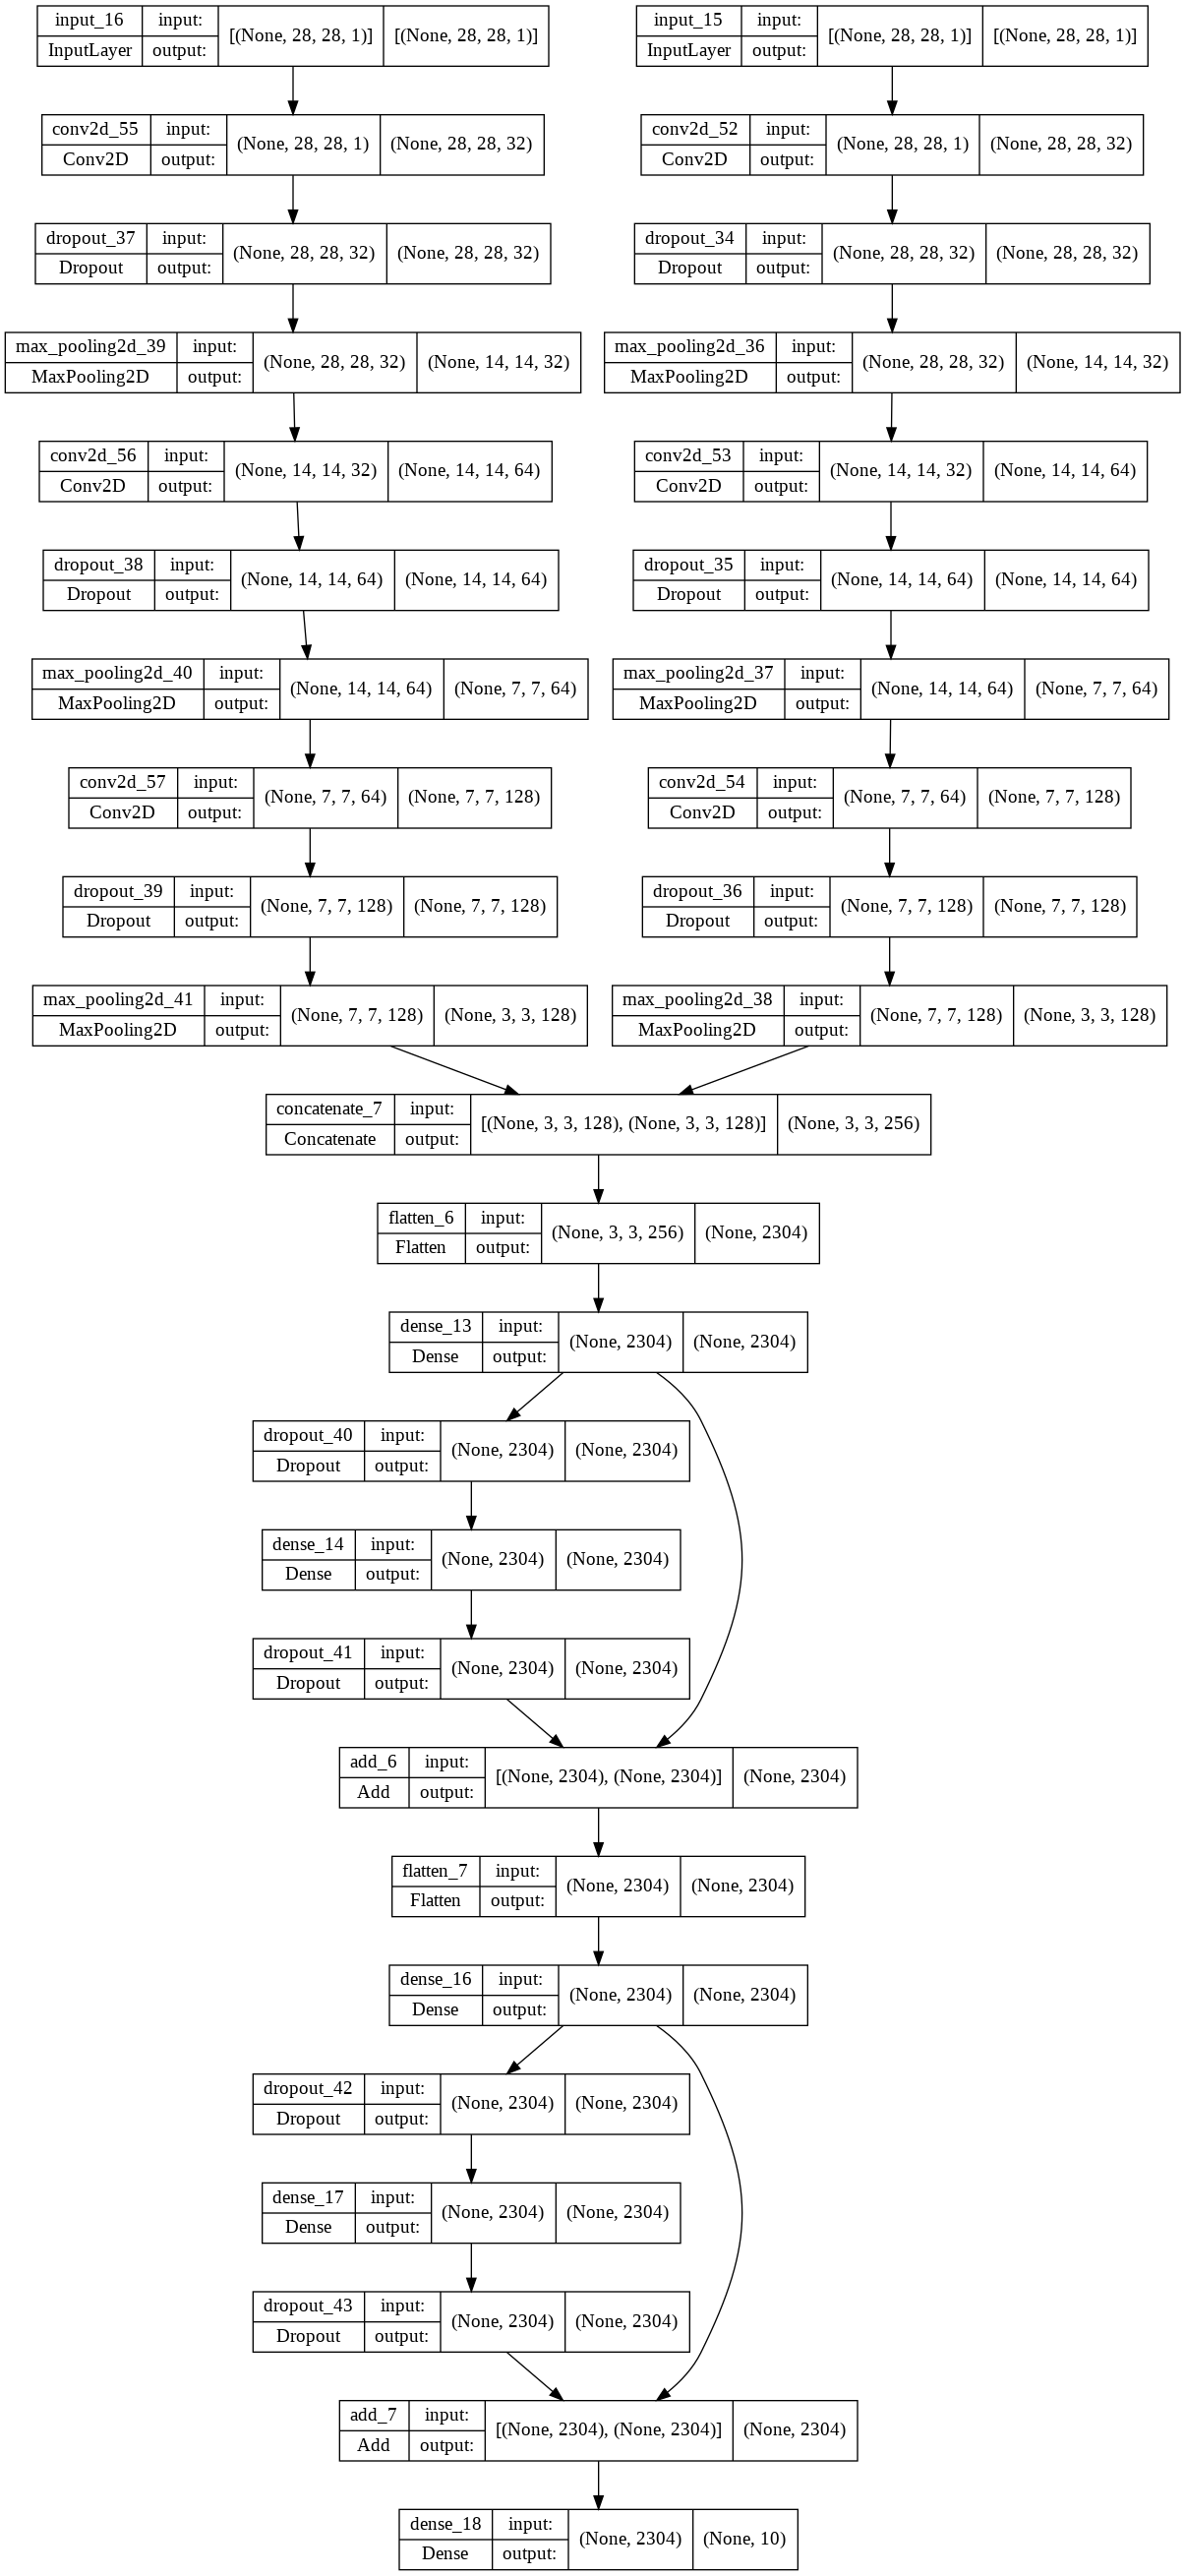

In [79]:
plot_model(model, to_file='model.png', show_shapes=True)

## Preparing the model for training.

In [80]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [81]:
# train the model with input images and labels
model.fit([x_train, x_train],
          y_train_2, 
          validation_data=([x_test, x_test], y_test_2),
          epochs=11,
          batch_size=batch_size)


Epoch 1/11
1875/1875 [==============================] - 54s 28ms/step - loss: 0.2430 - accuracy: 0.9286 - val_loss: 0.1514 - val_accuracy: 0.9821
Epoch 2/11
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1009 - accuracy: 0.9736 - val_loss: 0.1472 - val_accuracy: 0.9757
Epoch 3/11
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0830 - accuracy: 0.9779 - val_loss: 0.0865 - val_accuracy: 0.9847
Epoch 4/11
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0733 - accuracy: 0.9808 - val_loss: 0.1203 - val_accuracy: 0.9857
Epoch 5/11
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0675 - accuracy: 0.9821 - val_loss: 0.1251 - val_accuracy: 0.9864
Epoch 6/11
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0607 - accuracy: 0.9840 - val_loss: 0.1058 - val_accuracy: 0.9871
Epoch 7/11
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0617 - accuracy: 0.9840 - val_loss: 0.0979 -

# saveing the results

In [89]:
model.save('Different structure of a neural network_model.h5')

## Evaluation

In [85]:
# model accuracy on test dataset
score = model.evaluate([x_test, x_test],
                       y_test_2,
                       batch_size=batch_size,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.3%


## I've completely overcome the overfitting problem, and that's pretty good.

**I have been able to overcome the accuracy level of the last neural network structures in the previous projects, and the results are summarized in the following:
The accuracy level of the training data was 98.7%, while the accuracy level of the test data was 99.3%, and the difference between the numbers gives a high indication of overcoming the problem of overfitting.**

## I'll stop now, and continue later.